In [ ]:
# pip install xgboost

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# trained the model on these below features to predict GHI using Gradient Boosting Machines (GBM), particularly XGBoost method.
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("merged_df.csv")

# Convert the 'Year', 'Month', 'Day', 'Hour', 'Minute' columns to a datetime column
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Extract temporal features
df['Year'] = df['Datetime'].dt.year
df['Month_sin'] = np.sin(2 * np.pi * df['Datetime'].dt.month / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Datetime'].dt.month / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Datetime'].dt.day / df['Datetime'].dt.days_in_month)
df['Day_cos'] = np.cos(2 * np.pi * df['Datetime'].dt.day / df['Datetime'].dt.days_in_month)
df['Hour_sin'] = np.sin(2 * np.pi * df['Datetime'].dt.hour / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Datetime'].dt.hour / 24)

# Spatial features
# Assuming the 'Latitude' and 'Longitude' features represent the location
# which could be useful if the dataset spans multiple geographic locations
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Weather-related features
# 'Clearsky DHI' and 'Clearsky DNI' as features could provide a baseline for GHI
df['Clearsky DHI'] = df['Clearsky DHI'].astype(float)
df['Clearsky DNI'] = df['Clearsky DNI'].astype(float)

# Features and target variable for the model
features = [
    'Cloud Type', 'Dew Point', 'Ozone', 'Relative Humidity',
    'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
    'Precipitable Water', 'Wind Direction', 'Wind Speed',
    'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos',
    'Hour_sin', 'Hour_cos', 'Latitude', 'Longitude',
    'Clearsky DHI', 'Clearsky DNI'
]

# Update the features list if you create new interaction terms or other engineered features

# Define the target variable
target = 'GHI'

# Prepare the feature matrix (X) and the target array (y)
X = df[features]
X_with_datetime = df[features + ['Datetime']]  # Temporarily include 'Datetime' for later use
y = df[target]

# Separate 'Datetime' from features after the split
X_train = X_with_datetime_train.drop(columns=['Datetime'])
X_test = X_with_datetime_test.drop(columns=['Datetime'])
Datetime_train = X_with_datetime_train['Datetime']
Datetime_test = X_with_datetime_test['Datetime']

# The X and y are now ready to be used for training a machine learning model.

FileNotFoundError: [Errno 2] No such file or directory: 'merged_df.csv'

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7]
}


In [ ]:
# Split the data into training and testing sets
X_with_datetime_train, X_with_datetime_test, y_train, y_test = train_test_split(X_with_datetime, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the XGBRegressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300}
Best score: 2165.3106996739175


In [ ]:
print(grid_search.best_params_)


{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300}


In [ ]:
# Retrieve the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize the XGBRegressor with the best parameters
xgb_model = xgb.XGBRegressor(
    objective ='reg:squarederror',
    colsample_bytree = best_params['colsample_bytree'],
    learning_rate = best_params['learning_rate'],
    max_depth = best_params['max_depth'],
    alpha=10,
    n_estimators = best_params['n_estimators']
)

# xgb_model = xgb.XGBRegressor(
#     objective ='reg:squarederror',
#     colsample_bytree = 0.7,
#     learning_rate = 0.1,
#     max_depth = 7,
#     alpha=10,
#     n_estimators = 300
# )

# Fit the model with the best parameters
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

predictions_with_datetime = pd.DataFrame({
    'Predicted GHI': y_pred,
    'Actual GHI': y_test
}, index=X_test.index)

# Join 'Datetime' from the original df based on the index
predictions_with_datetime = predictions_with_datetime.join(df[['Datetime']])

In [ ]:
predictions_with_datetime.columns

Index(['Predicted GHI', 'Actual GHI', 'Datetime'], dtype='object')

In [ ]:
# Calculate the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model Mean Squared Error: {mse}')
print(f'Model R^2 Score: {r2}')


Model Mean Squared Error: 2154.7950098035167
Model R^2 Score: 0.9751311874952246


In [ ]:
# Display actual vs. predicted values
predictions_df = pd.DataFrame({'Actual GHI': y_test, 'Predicted GHI': y_pred})
print(predictions_df.head())

        Actual GHI  Predicted GHI
587246         234     244.991058
329396           0      -0.821701
519018          54      54.900558
526736          95     100.143005
612849         353     348.254944


In [ ]:
# Assuming 'predictions_df' is your DataFrame containing both actual and predicted GHI values
predictions_df['Residuals'] = predictions_df['Actual GHI'] - predictions_df['Predicted GHI']

The residuals are centered around the zero line, which is good—it means that the model doesn't have a systematic bias to overpredict or underpredict across all ranges of predictions.

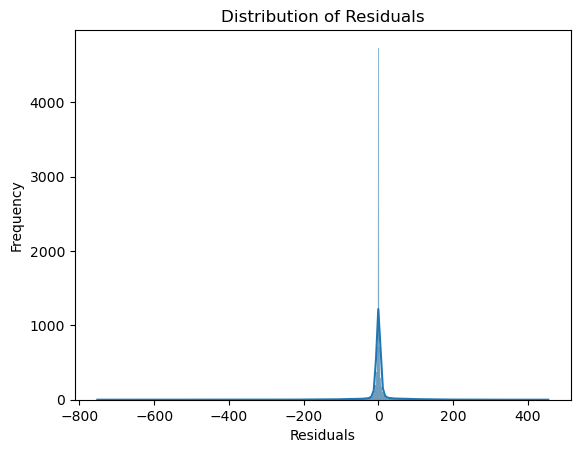

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of residuals
sns.histplot(predictions_df['Residuals'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


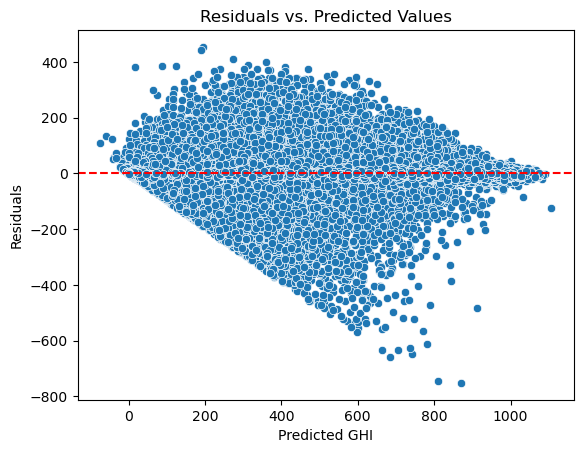

In [ ]:
sns.scatterplot(x=predictions_df['Predicted GHI'], y=predictions_df['Residuals'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted GHI')
plt.ylabel('Residuals')
plt.show()


In [ ]:
# Summary statistics for residuals
residual_stats = predictions_df['Residuals'].describe()
print(residual_stats)


count    140160.000000
mean         -0.000417
std          46.419935
min        -751.932190
25%          -1.832645
50%           0.075881
75%           1.927134
max         453.964310
Name: Residuals, dtype: float64


In [ ]:
def optimize_solar_operations(predicted_ghi, threshold=200):
    """
    Function to determine operational adjustments based on predicted GHI.

    Parameters:
    - predicted_ghi: DataFrame with datetime index and predicted GHI values.
    - threshold: GHI threshold to decide on operational adjustments.

    Returns:
    - Adjustments recommendations as a DataFrame.
    """
    # Determine when to scale up or scale down operations
    predicted_ghi['Operation'] = np.where(predicted_ghi['Predicted GHI'] > threshold, 'Scale Up', 'Scale Down')

    return predicted_ghi[['Predicted GHI', 'Operation']]

def inform_energy_trading(predicted_ghi, selling_price, buying_price, threshold=150):
    """
    Function to make energy trading decisions based on predicted GHI.

    Parameters:
    - predicted_ghi: DataFrame with datetime index and predicted GHI values.
    - selling_price: Price at which you're willing to sell excess energy.
    - buying_price: Price at which you're willing to buy additional energy.
    - threshold: GHI threshold to decide on buying or selling energy.

    Returns:
    - Trading recommendations as a DataFrame.
    """
    predicted_ghi['Trade Decision'] = np.where(predicted_ghi['Predicted GHI'] > threshold,
                                               f"Sell at ${selling_price}/kWh",
                                               f"Buy at ${buying_price}/kWh")

    return predicted_ghi[['Predicted GHI', 'Trade Decision']]


In [ ]:
operations_df = optimize_solar_operations(predictions_df)
trading_df = inform_energy_trading(predictions_df, selling_price=0.10, buying_price=0.08)

# After getting 'operations_df' and 'trading_df', reset their index to make 'Datetime' a column
operations_df.reset_index(inplace=True)
trading_df.reset_index(inplace=True)

print(operations_df.head())
print(trading_df.head())




             Datetime  Predicted GHI   Operation
0 2019-01-14 14:00:00     244.991058    Scale Up
1 2020-08-08 20:00:00      -0.821701  Scale Down
2 2022-04-01 18:00:00      54.900558  Scale Down
3 2019-02-17 08:00:00     100.143005  Scale Down
4 2021-12-17 09:00:00     348.254944    Scale Up
             Datetime  Predicted GHI    Trade Decision
0 2019-01-14 14:00:00     244.991058  Sell at $0.1/kWh
1 2020-08-08 20:00:00      -0.821701  Buy at $0.08/kWh
2 2022-04-01 18:00:00      54.900558  Buy at $0.08/kWh
3 2019-02-17 08:00:00     100.143005  Buy at $0.08/kWh
4 2021-12-17 09:00:00     348.254944  Sell at $0.1/kWh


Scatter Plot (Operations): Highlights specific days with decisions to scale up or scale down operations based on predicted GHI, aiding in operational planning for energy production.

Scatter Plot (Trading): Marks days where energy trading decisions (buy or sell) are suggested, assisting in strategic energy trading and grid management.

This visualization offers a comprehensive view of how the model's predictions can inform various decision-making processes in the context of solar energy management. It visually integrates predictive insights with actionable decisions, supporting stakeholders in making informed strategies related to energy production, grid management, and solar infrastructure investment.

Locator attempting to generate 1608 ticks ([17824.0, ..., 19431.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1608 ticks ([17824.0, ..., 19431.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1608 ticks ([17824.0, ..., 19431.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1608 ticks ([17824.0, ..., 19431.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1608 ticks ([17824.0, ..., 19431.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1608 ticks ([17824.0, ..., 19431.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1608 ticks ([17824.0, ..., 19431.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1608 ticks ([17824.0, ..., 19431.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1608 ticks ([17824.0, ..., 19431.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

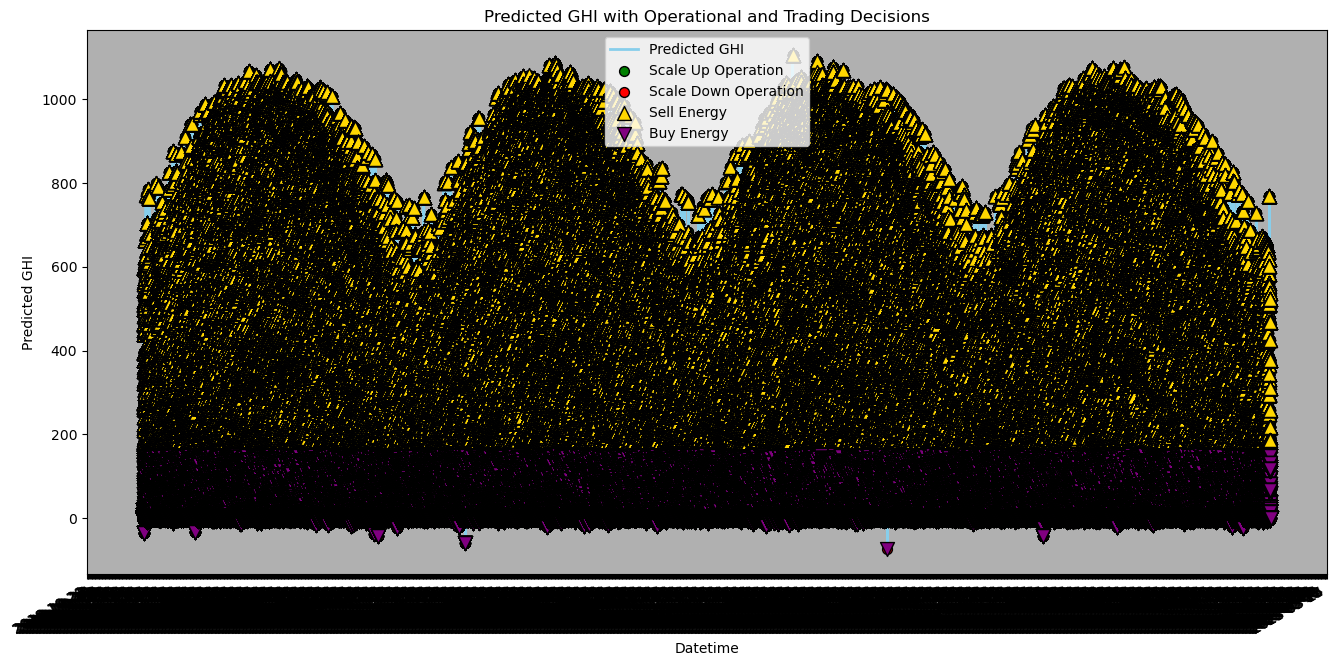

In [ ]:
# Ensure 'Datetime' is the index for predictions_df, operations_df, and trading_df
if 'Datetime' not in predictions_df.columns:
    predictions_df.reset_index(inplace=True)
predictions_df.set_index('Datetime', inplace=True)

if 'Datetime' not in operations_df.columns:
    operations_df.reset_index(inplace=True)
operations_df.set_index('Datetime', inplace=True)

if 'Datetime' not in trading_df.columns:
    trading_df.reset_index(inplace=True)
trading_df.set_index('Datetime', inplace=True)

# Combine using suffixes to avoid 'ValueError' due to column overlap
# Assuming 'Operation' column might be in both predictions_df and operations_df, which is less likely from the initial setup but just to ensure
# And similarly for 'Trade Decision' which might overlap
combined_df = predictions_df.join(operations_df[['Operation']], how='left', rsuffix='_op').join(trading_df[['Trade Decision']], how='left', rsuffix='_trade')

# Visualization code continues as before
plt.figure(figsize=(16, 8))

# Plot Predicted GHI
plt.plot(combined_df.index, combined_df['Predicted GHI'], label='Predicted GHI', color='skyblue', linewidth=2)

# Highlight operations decisions
scale_up_mask = combined_df['Operation'] == 'Scale Up'
scale_down_mask = combined_df['Operation'] == 'Scale Down'
plt.scatter(combined_df[scale_up_mask].index, combined_df[scale_up_mask]['Predicted GHI'], color='green', label='Scale Up Operation', s=50, edgecolor='black', zorder=5)
plt.scatter(combined_df[scale_down_mask].index, combined_df[scale_down_mask]['Predicted GHI'], color='red', label='Scale Down Operation', s=50, edgecolor='black', zorder=5)

# Add markers for trading decisions
sell_points = combined_df[combined_df['Trade Decision'].str.contains('Sell', na=False)]
buy_points = combined_df[combined_df['Trade Decision'].str.contains('Buy', na=False)]

plt.scatter(sell_points.index, sell_points['Predicted GHI'], marker='^', color='gold', label='Sell Energy', s=100, edgecolor='black', zorder=5)
plt.scatter(buy_points.index, buy_points['Predicted GHI'], marker='v', color='purple', label='Buy Energy', s=100, edgecolor='black', zorder=5)

# Improve the layout
plt.title('Predicted GHI with Operational and Trading Decisions')
plt.xlabel('Datetime')
plt.ylabel('Predicted GHI')
plt.legend(loc='best')
plt.grid(True)

# Format the x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotation for better date display

# plt.show()
plot_subplots(combined_df)



NameError: name 'combined_df' is not defined

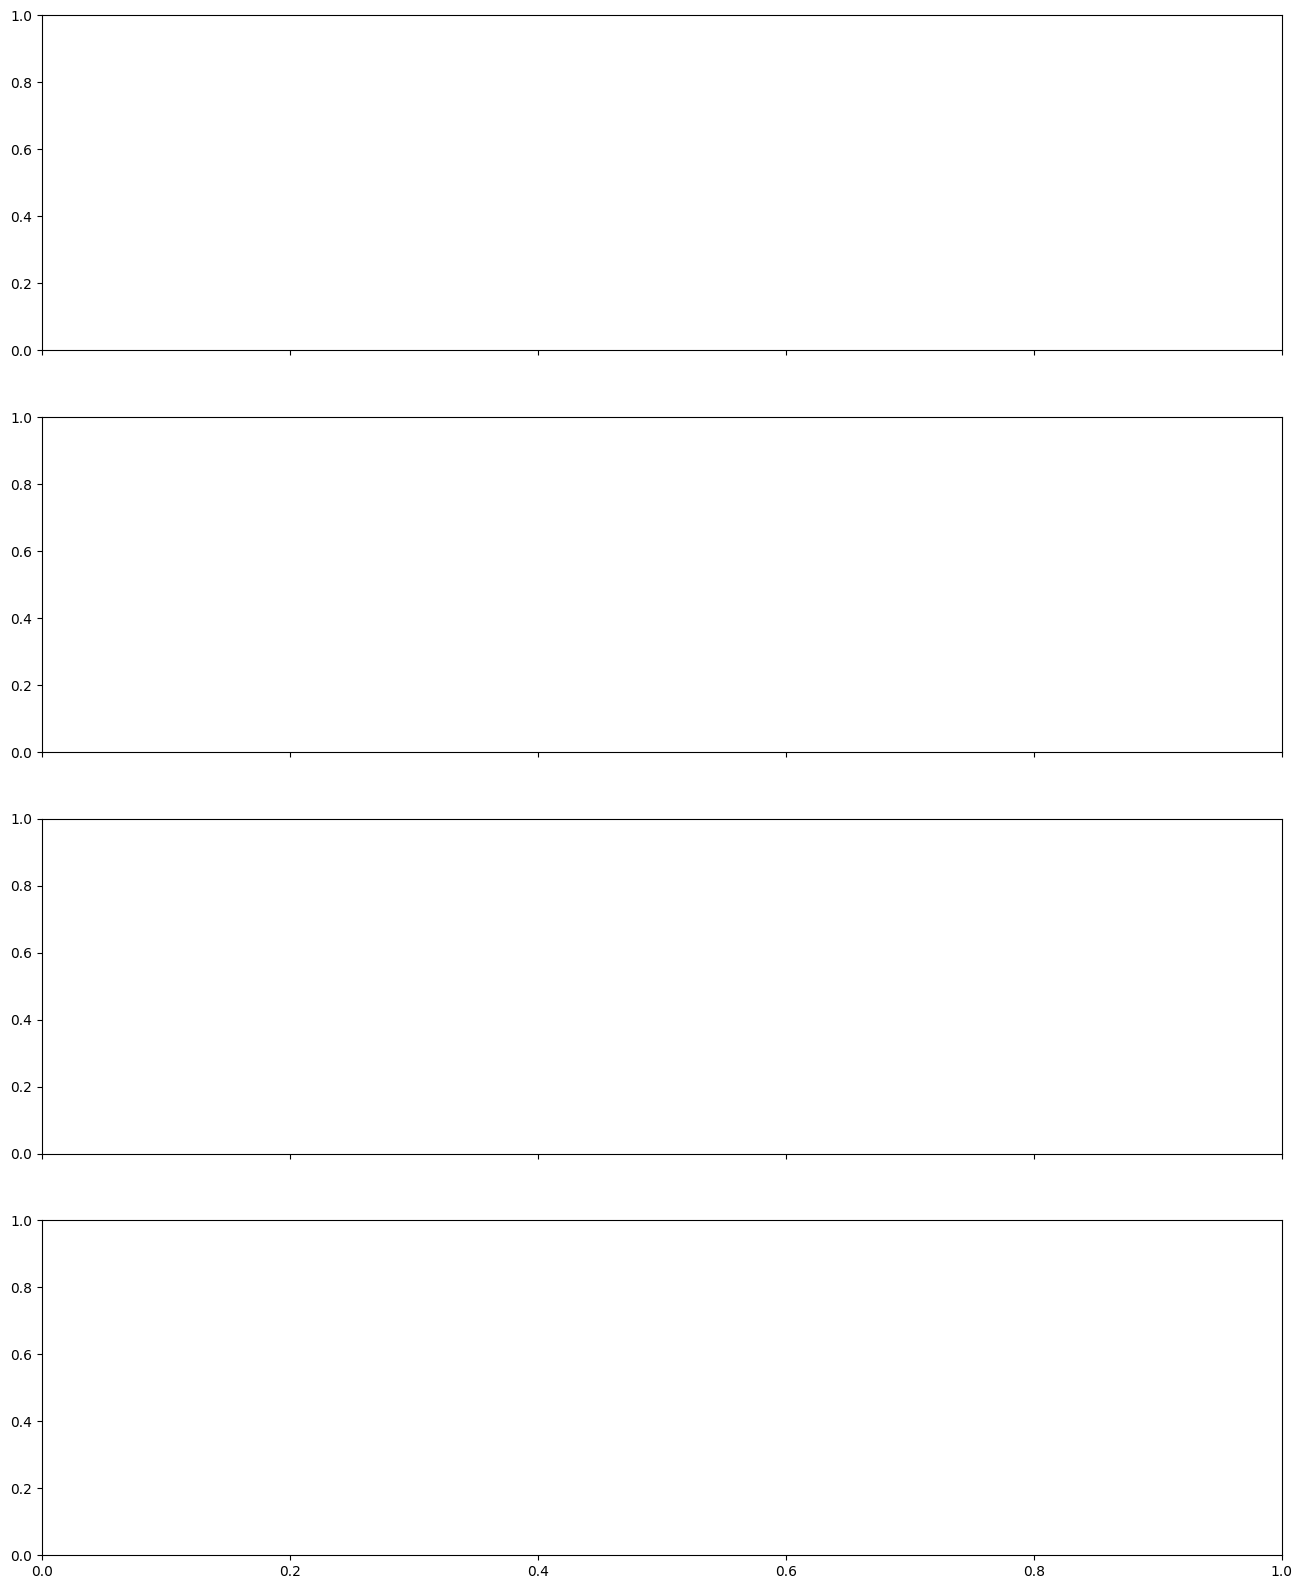

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming combined_df is already defined and has 'Datetime' as index
# Let's create a subplot for each category to avoid cluttering

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 20), sharex=True)

# Plot Predicted GHI on all subplots to provide a reference
for ax in axes:
    ax.plot(combined_df.index, combined_df['Predicted GHI'], label='Predicted GHI', color='skyblue', linewidth=2, alpha=0.5)

# Subplot for Scale Up Operations
scale_up_mask = combined_df['Operation'] == 'Scale Up'
axes[0].scatter(combined_df[scale_up_mask].index, combined_df[scale_up_mask]['Predicted GHI'], color='green', label='Scale Up Operation', s=50, edgecolor='black', zorder=5)
axes[0].set_title('Scale Up Operations')

# Subplot for Scale Down Operations
scale_down_mask = combined_df['Operation'] == 'Scale Down'
axes[1].scatter(combined_df[scale_down_mask].index, combined_df[scale_down_mask]['Predicted GHI'], color='red', label='Scale Down Operation', s=50, edgecolor='black', zorder=5)
axes[1].set_title('Scale Down Operations')

# Subplot for Sell Energy
sell_points = combined_df[combined_df['Trade Decision'].str.contains('Sell', na=False)]
axes[2].scatter(sell_points.index, sell_points['Predicted GHI'], marker='^', color='gold', label='Sell Energy', s=100, edgecolor='black', zorder=5)
axes[2].set_title('Sell Energy Decisions')

# Subplot for Buy Energy
buy_points = combined_df[combined_df['Trade Decision'].str.contains('Buy', na=False)]
axes[3].scatter(buy_points.index, buy_points['Predicted GHI'], marker='v', color='purple', label='Buy Energy', s=100, edgecolor='black', zorder=5)
axes[3].set_title('Buy Energy Decisions')

# Set common labels and legend
for ax in axes:
    ax.set_ylabel('Predicted GHI')
    ax.legend(loc='best')
    ax.grid(True)

# Improve the layout and set common x-axis properties
plt.xlabel('Datetime')
plt.tight_layout()
plt.gcf().autofmt_xdate()  # Rotation for better date display

# Format the x-axis for better readability
axes[-1].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()


In [ ]:
# Calculate the daily average of predicted GHI
daily_avg_ghi = predictions_df.resample('D').mean()['Predicted GHI']


C:\Users\cheta\AppData\Local\Temp\ipykernel_4704\2723222934.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_avg_ghi = predictions_df.resample('D').mean()['Predicted GHI']


Energy Production: Periods with higher average predicted GHI suggest potential for increased solar energy production. This could inform operational planning, such as scheduling maintenance during lower production periods.

Grid Management: Understanding fluctuations in solar energy production can help grid operators anticipate changes in supply. Days with low predicted GHI might require support from other energy sources to meet demand.

Investment in Solar Infrastructure: Long-term trends in predicted GHI could inform decisions about where and when to invest in additional solar infrastructure. Consistently high GHI areas might be prime candidates for new solar projects.

This visualization provides a high-level overview of expected solar energy production capabilities, which can be a valuable tool in strategic planning and operational adjustments for energy companies and grid operators. It simplifies complex predictions into actionable insights, facilitating informed decision-making related to energy production, grid management, and infrastructure investments.

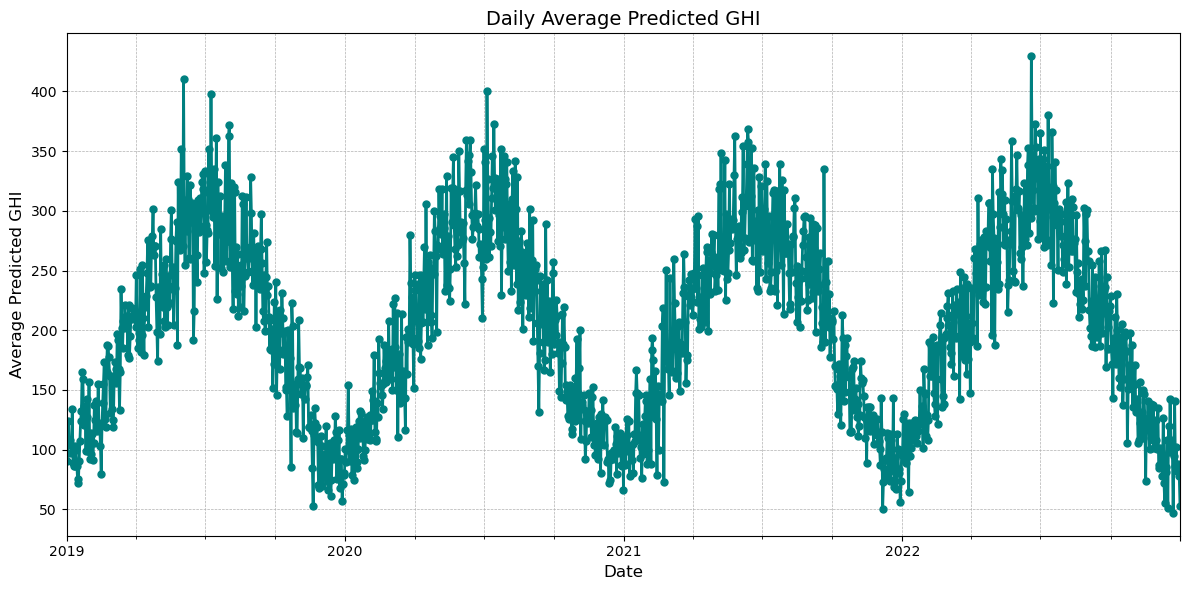

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_avg_ghi.plot(kind='line', color='teal', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Daily Average Predicted GHI', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Predicted GHI', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
